<img src="fireblaze.jpg" width=150 height=100 />

# Vehicle Fuel Consumption Prediction

<img src="https://media.giphy.com/media/l2R0e9y6A304JkFOg/source.gif">      


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load and check data

In [2]:
ad = pd.read_csv('auto-mpg.csv')

In [3]:
ad.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
ad.shape

(398, 9)

In [5]:
#info of given data

ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 24.9+ KB


In [6]:
ad.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Missing Values

In [7]:
print(ad.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [8]:
#find out unique values

ad.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
#so we now change it to NaN values and fill

In [10]:
ad.horsepower = ad.horsepower.str.replace('?', 'NaN').astype(float)

In [11]:
#find out unique values

ad.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [12]:
ad.horsepower.fillna(ad.horsepower.mean(), inplace=True)

In [13]:
#find out unique values

ad.horsepower.unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 104.46938776, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

In [14]:
ad.horsepower = ad.horsepower.astype(int)

In [15]:
#find out unique values

ad.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 104, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82])

In [16]:
type(ad.horsepower)

pandas.core.series.Series

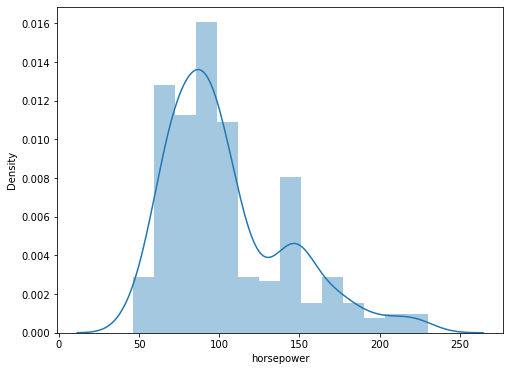

In [17]:
plt.figure(figsize=(8,6))
sns.distplot(ad.horsepower)
plt.show()

In [18]:
#find out unique value

In [19]:
org = ad['origin'].astype(str)

In [20]:
org.head()

0    1
1    1
2    1
3    1
4    1
Name: origin, dtype: object

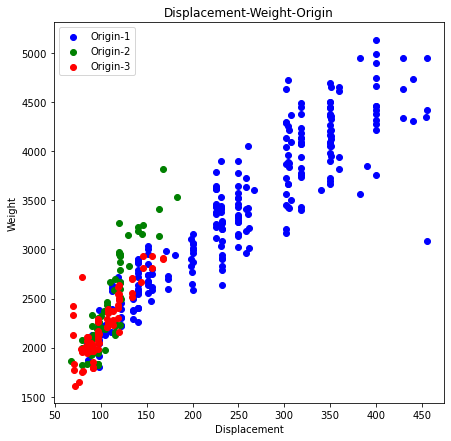

In [21]:
origin_1 = ad[org=='1']
origin_2 = ad[org=='2']
origin_3 = ad[org=='3']


plt.figure(figsize=(7,7))
plt.scatter(origin_1['displacement'], origin_1['weight'], label='Origin-1', color='blue')
plt.scatter(origin_2['displacement'], origin_2['weight'], label='Origin-2', color='green')
plt.scatter(origin_3['displacement'], origin_3['weight'], label='Origin-3', color='red')

plt.title('Displacement-Weight-Origin')
plt.xlabel('Displacement')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [22]:
# let's visualize the distribution of the features of the cars

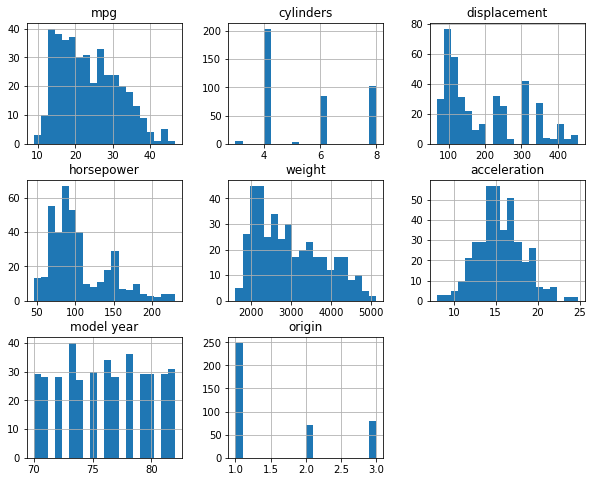

In [23]:
ad.hist(figsize=(10,8), bins=20)
plt.show()

In [24]:
#visualize the TOP-10 horsepower with respect to car

<AxesSubplot:title={'center':'TOP 10'}, xlabel='Horsepower', ylabel='Car_Name'>

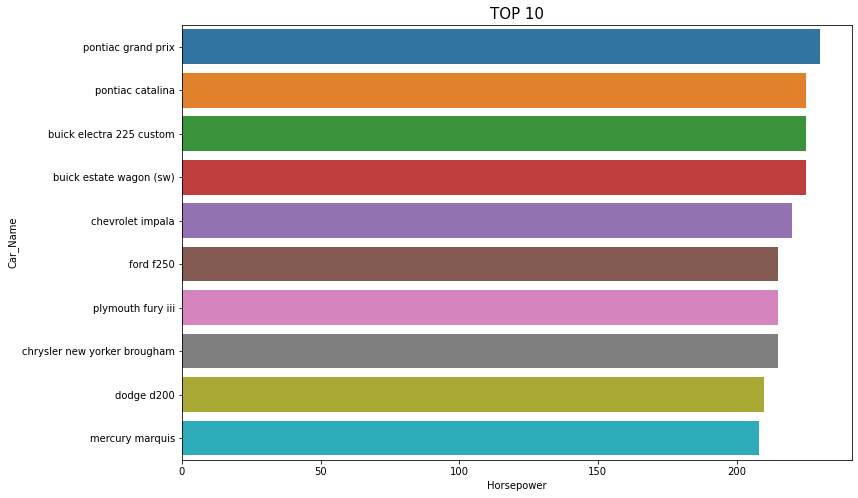

In [25]:
top_10_horsepower = {'Car_Name':ad['car name'], 'Horsepower':ad['horsepower']}

top_10_horsepower = pd.DataFrame(top_10_horsepower)

top_10_horsepower = top_10_horsepower[['Car_Name', 'Horsepower']].sort_values(by='Horsepower', ascending=False)[0:10]

plt.figure(figsize=(12,8))
plt.title('TOP 10', size=15)

sns.barplot(x='Horsepower', y='Car_Name', data = top_10_horsepower)

In [26]:
#visualize the relationship between variables

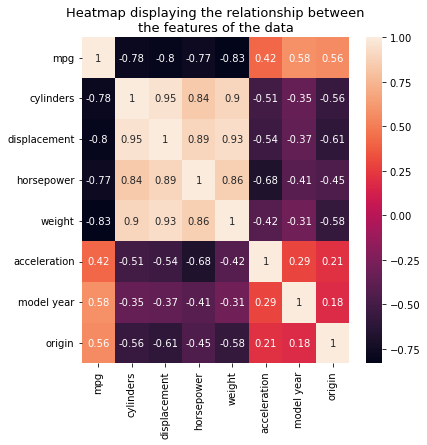

In [27]:
plt.figure(figsize=(6,6))
sns.heatmap(ad.corr(),annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',fontsize=13)
plt.show()

# Preprocessing

In [28]:
data = ad.drop(['car name'],axis=1)

In [29]:
#let's define the dependent and independent variable


In [30]:
X = data.drop(['mpg'], axis=1)
y = data.mpg

In [31]:
X.shape

(398, 7)

In [32]:
y.shape

(398,)

# Splitting the dataset

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [35]:
X_train.shape

(298, 7)

In [36]:
X_test.shape

(100, 7)

In [37]:
y_train.shape

(298,)

# Standardization

In [38]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [39]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test) 

# KNN

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
kr = KNeighborsRegressor(n_neighbors=19)

In [56]:
kr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=19)

In [57]:
y_predict = kr.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
print('The mean squared error is: ',mean_squared_error(y_test, y_predict))
print('The R2 Score of the model is: ',r2_score(y_test, y_predict))

The mean squared error is:  9.512572853185599
The R2 Score of the model is:  0.8324765086194099


# Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
y_predict = lr.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
mse = mean_squared_error(y_test, y_predict)

In [46]:
print('Linear Regression MSE:', mse)

Linear Regression MSE: 9.263262945438646


In [47]:
from sklearn import metrics

In [48]:
# make prediction with the fitted model
linear_pred = lr.predict(X_test) 

# score the model on the train set
print('Train score: {}\n'.format(lr.score(X_train,y_train)))

# score the model on the test set
print('Test score: {}\n'.format(lr.score(X_test,y_test)))

# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))

# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))

Train score: 0.812795034287559

Test score: 0.8368670417407995

Overall model accuracy: 0.8368670417407995

Mean Squared Error: 9.263262945438646


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


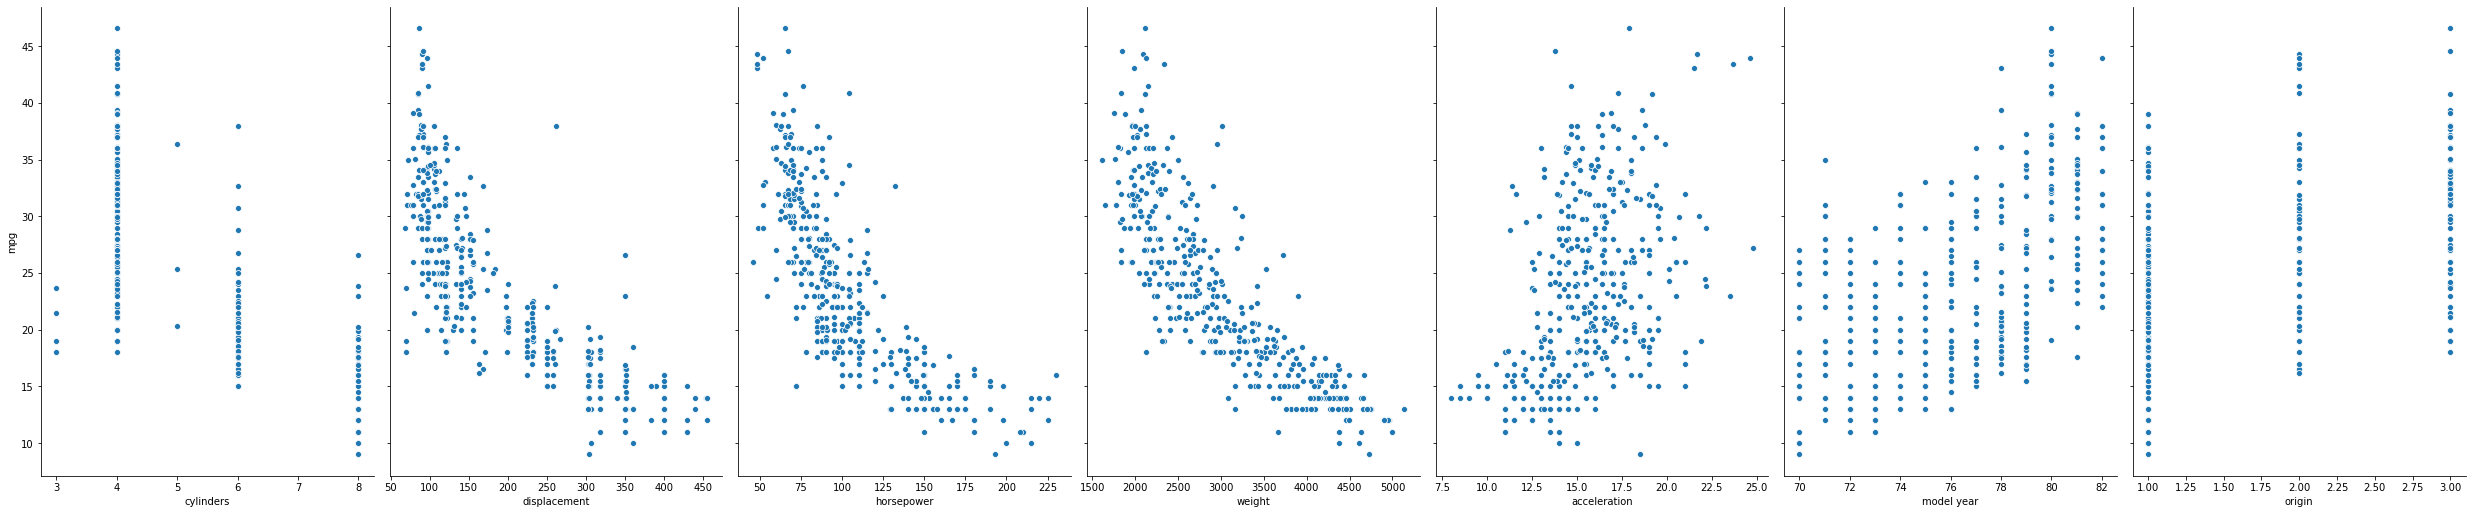

In [50]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(ad, x_vars=['cylinders','displacement','horsepower','weight','acceleration','model year','origin'], y_vars='mpg', size=7, aspect=0.7)

In [55]:
x = data.drop(["mpg"],axis=1)
y = data.mpg

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.25)

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

In [66]:
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred)))


R squared: 0.8418845382562888


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


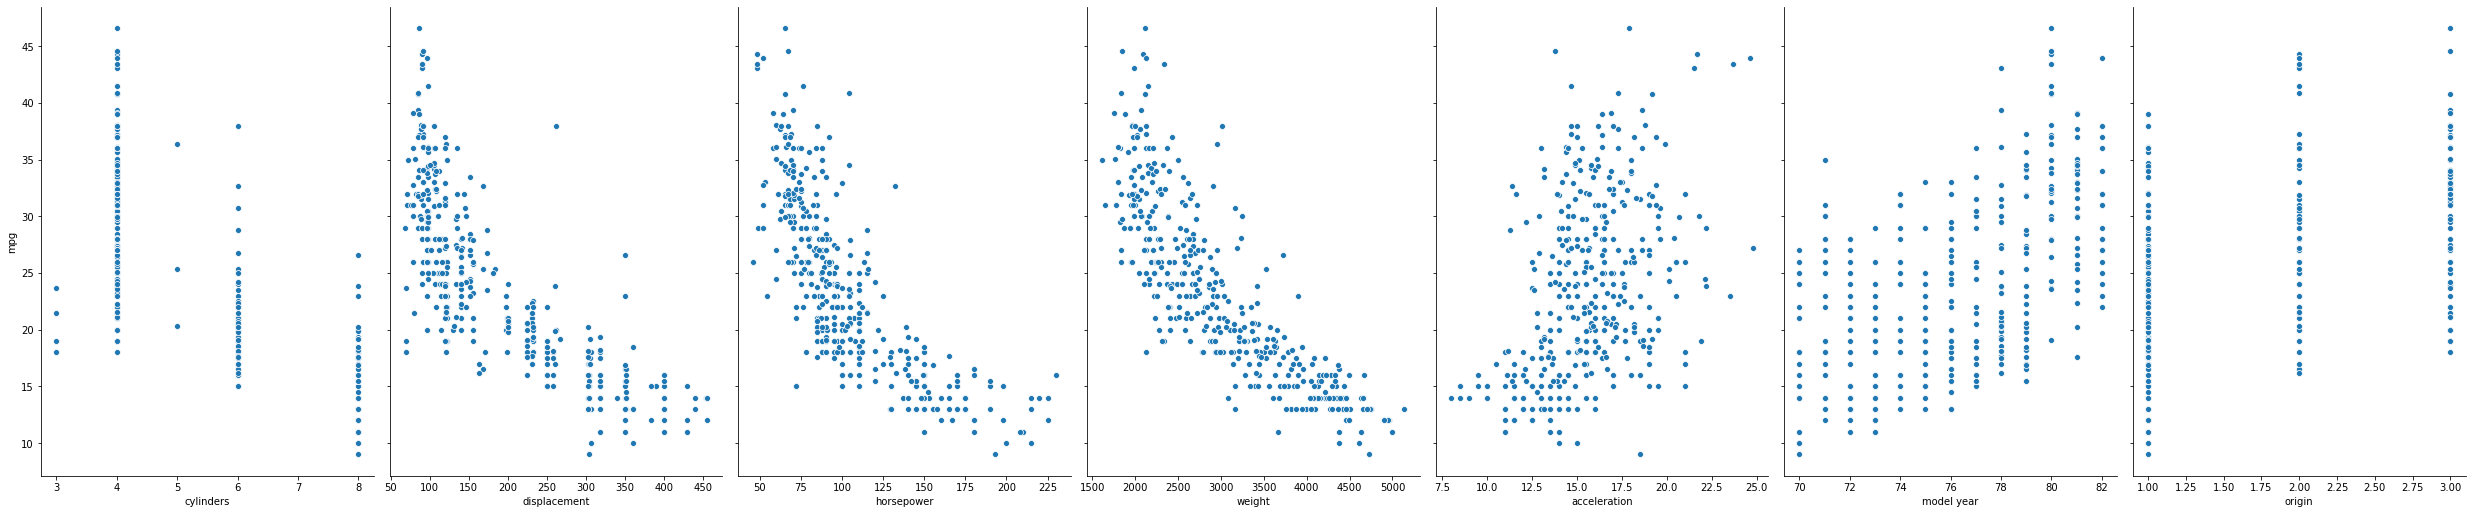

In [67]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(data, x_vars=['cylinders','displacement','horsepower','weight','acceleration','model year','origin'], y_vars='mpg', size=7, aspect=0.7)

In [69]:
residuals = y_test.values-y_pred


In [70]:
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.0011443578748754036


# Check for Homoscedasticity

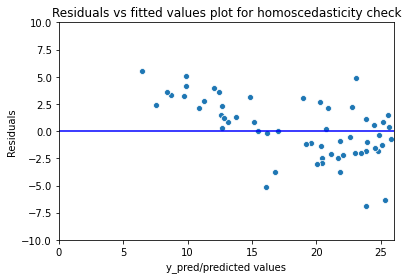

In [71]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

### Check for normality of error terms

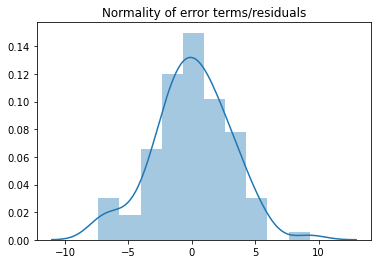

In [72]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

# No Autocorrelation

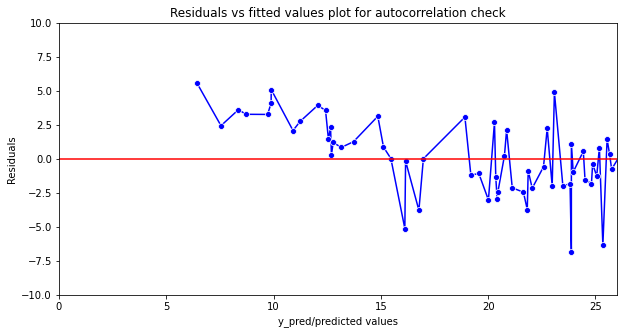

In [73]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [74]:
import warnings
warnings.filterwarnings('ignore')